# consistency checks for lpm annihilation simulation
Timothy Tyree<br>
3.29.2023

In [49]:
from lib.my_initialization import *

In [50]:
import subprocess

In [51]:
plt.plot([1]*4)
plt.close()
#reset matplotlib
import matplotlib
matplotlib.rcParams.update(matplotlib.rcParamsDefault)
mpl.rcParams.update(matplotlib.rcParamsDefault) #reset matplotlib

# define module

# consistency check for return_CollTime.c

In [192]:
# cfolder=f"{nb_dir}/../c/attractive"
cfolder='/Users/timothytyree/Documents/GitHub/bgmc/c/attractive'
# cfolder='/home/timothytyree/Documents/GitHub/bgmc/c/attractive'
os.chdir(cfolder)

In [193]:
!pwd

/Users/timothytyree/Documents/GitHub/bgmc/c/attractive


In [194]:
#compile the executable
os.system('./gcc.sh')

0

In [195]:
# # input_string = f"0.155 0.4158 5 300 9.3154 1 0.0001 0.0001 4 10000 1 0 0 0 0 1 2"
# # input_string = f"0.155 0.4158 5 300 9.3154 1 0.0001 0.0001 4 2 1 0 0 0 0 1 2"
# func_path = f"{cfolder}/return_CollTime.x"
# f"{func_path} {input_string}"
# # os.system(f"{func_path} {input_string}")
# # os.system(f"{func_path} {input_string} | grep 'Tavg=' | grep -Eo '[+-]?[0-9]+([.][0-9]+)?'")
# os.system(f"{func_path} <<< {input_string} | grep 'Tavg=' | grep -Eo '[+-]?[0-9]+([.][0-9]+)?'")
# # os.system(f"/return_CollTime.x < 1-control.input | grep 'Tavg=' | grep -Eo '[+-]?[0-9]+([.][0-9]+)?'")

In [196]:
# N0_lst=list(range(2,100,4))
# N0_lst=list(range(2,100,8))
N0_lst=list(range(2,102,2))
# N0_lst

In [57]:
niter=1000
dt=1e-4
L=5
# L=10 
D=0.42#0.4158
alinear=9.3#9.3154
neighbor=0
r=0.155
kappa=300
# seed=1
seed=0
task_lst=[]
# for N0 in range(2,100,2):
for N0 in N0_lst:
    input_string = f"{r} {D} {L} {kappa} {alinear} 1 {dt} {dt} {N0} {niter} {seed} 0 0 0 0 {neighbor} 2"
    call_string = f"/Users/timothytyree/Documents/GitHub/bgmc/c/attractive/return_CollTime.x <<< '{input_string}'"
    call_string+= " | grep 'Tavg=' | grep -Eo '[+-]?[0-9]+([.][0-9]+)?'"
    task_lst.append(call_string)
print(f"{len(task_lst)=}")
call_string

len(task_lst)=50


"/Users/timothytyree/Documents/GitHub/bgmc/c/attractive/return_CollTime.x <<< '0.155 0.42 5 300 9.3 1 0.0001 0.0001 100 1000 0 0 0 0 0 0 2' | grep 'Tavg=' | grep -Eo '[+-]?[0-9]+([.][0-9]+)?'"

In [58]:
print(retval)

[0.131322, 0.0409117, 0.018264, 0.0110846, 0.00836416, 0.00576834, 0.00455071, 0.0036219, 0.00321197, 0.00262181, 0.00227703, 0.00205087, 0.0017143, 0.00162942, 0.00141236, 0.00130125, 0.00117286, 0.00104599, 0.00098967, 0.000942411, 0.000853312, 0.000790139, 0.000704972, 0.000685969, 0.000661937, 0.000608138, 0.000567319, 0.00054965, 0.000528019, 0.000500825, 0.000482402, 0.00045, 0.000438443, 0.000424393, 0.000403722, 0.000368, 0.00036871, 0.000349875, 0.000342246, 0.000324769, 0.000322267, 0.000290983, 0.000293666, 0.000265928, 0.000275278, 0.000270404, 0.00025546, 0.000247193, 0.000245141, 0.000239968]


In [59]:
def routine(call_string):
    return eval(subprocess.check_output(call_string, shell=True))

In [60]:
retval=[]
for call_string in task_lst:
    retval.append(routine(call_string))
len(retval)

50

In [61]:
# retval

In [62]:
# #run daskbag
# printing=True
# max_num_jobs=os.cpu_count()-1
# npartitions=np.min((len(task_lst),max_num_jobs))
# if printing:
#     print(f"running {len(task_lst)} tasks over {npartitions} cpu cores...")
# retval=eval_routine_daskbag(routine,task_lst,npartitions,printing=printing)
# if printing:
#     print(f"tasks complete!")

In [63]:
retval=[0.131322, 0.0409117, 0.018264, 0.0110846, 0.00836416, 0.00576834, 0.00455071, 0.0036219, 0.00321197, 0.00262181, 0.00227703, 0.00205087, 0.0017143, 0.00162942, 0.00141236, 0.00130125, 0.00117286, 0.00104599, 0.00098967, 0.000942411, 0.000853312, 0.000790139, 0.000704972, 0.000685969, 0.000661937, 0.000608138, 0.000567319, 0.00054965, 0.000528019, 0.000500825, 0.000482402, 0.00045, 0.000438443, 0.000424393, 0.000403722, 0.000368, 0.00036871, 0.000349875, 0.000342246, 0.000324769, 0.000322267, 0.000290983, 0.000293666, 0.000265928, 0.000275278, 0.000270404, 0.00025546, 0.000247193, 0.000245141, 0.000239968]

In [64]:
retval

[0.131322,
 0.0409117,
 0.018264,
 0.0110846,
 0.00836416,
 0.00576834,
 0.00455071,
 0.0036219,
 0.00321197,
 0.00262181,
 0.00227703,
 0.00205087,
 0.0017143,
 0.00162942,
 0.00141236,
 0.00130125,
 0.00117286,
 0.00104599,
 0.00098967,
 0.000942411,
 0.000853312,
 0.000790139,
 0.000704972,
 0.000685969,
 0.000661937,
 0.000608138,
 0.000567319,
 0.00054965,
 0.000528019,
 0.000500825,
 0.000482402,
 0.00045,
 0.000438443,
 0.000424393,
 0.000403722,
 0.000368,
 0.00036871,
 0.000349875,
 0.000342246,
 0.000324769,
 0.000322267,
 0.000290983,
 0.000293666,
 0.000265928,
 0.000275278,
 0.000270404,
 0.00025546,
 0.000247193,
 0.000245141,
 0.000239968]

In [65]:
A=L**2
q_lst=[]
w_lst=[]
Tavg_lst=[]
for N0,Tavg in zip(N0_lst,retval):
    rate = 1/Tavg
    w = rate/A
#     q = (N0+2)/A
    q = N0/A
    #record
    w_lst.append(w)
    q_lst.append(q)
    Tavg_lst.append(Tavg)

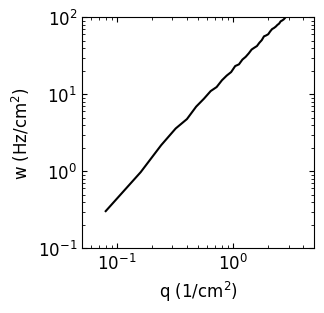

In [66]:
fig,ax=plt.subplots(figsize=(3,3))
fontsize=12
plt.plot(q_lst,w_lst,color='k')
plt.xscale('log')
plt.yscale('log')
plt.axis([5e-2,5e0,0.1,100])
plt.tick_params(top=True, right=True,direction='in',which='both')
format_plot(xlabel=r'q (1/cm$^2$)',ylabel=r'w (Hz/cm$^2$)',fontsize=fontsize)
plt.show()

In [67]:
beep(4)

-n 
-n 
-n 
-n 


0

In [68]:
df_rates = pd.DataFrame(dict(
    N0=N0_lst,
    Tavg=Tavg_lst,
    q=q_lst,
    w=w_lst))
rate_dir = f"{nb_dir}/data/control_data/lpm_table1_lr_L_5.csv"
df_rates.to_csv(rate_dir,index=False)
rate_dir

'/Users/timothytyree/Documents/GitHub/bgmc/python/data/control_data/lpm_table1_lr_L_5.csv'

In [69]:
kwargs = dict(data_fk_dir=f'{nb_dir}/data/full_results/data_fig4_vidmar_fk_tt.csv',
              data_lr_dir=f'{nb_dir}/data/full_results/data_fig4_vidmar_lr_tt.csv',
             min_num_particles=9)

In [70]:
dict_wjr = recall_death_rates_vidmar_rappel(**kwargs)
fk=dict_wjr['fk']
lr=dict_wjr['lr']
print(f"annihilation rate density powerlaw fits:")
dict_fit_death_fk = print_fit_power_law(x=fk['q'].values,y=fk['w'].values)
dict_fit_death_lr = print_fit_power_law(x=lr['q'].values,y=lr['w'].values)

annihilation rate density powerlaw fits:
m = 1.877234 +/- 0.024488
M = 5.572316 +/- 0.299027 Hz/cm^2; B=2.496963 +/- 0.039522
RMSE=0.1386 Hz/cm^2; R^2=0.9969; MPE=6.9910%; N=73
m = 1.637556 +/- 0.016847
M = 16.735599 +/- 0.829136 Hz/cm^2; B=5.587740 +/- 0.065801
RMSE=0.1340 Hz/cm^2; R^2=0.9973; MPE=7.2488%; N=100


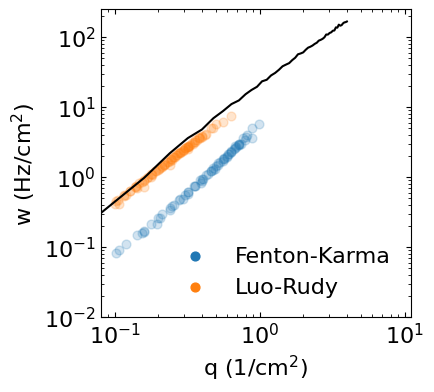

In [71]:
use_filterby_minN=True
minN=10
# minN=8
# figsize = (6, 4)  #(5,4)
figsize = (4, 4)  #(5,4)
fontsize=16

# x1lim=[0.008, 11]
x1lim=[0.08, 11]
x2lim=[0.01, 250]


fig, ax = plt.subplots(figsize=figsize)
ax = plot_death_rates_loglog_full(fk,lr,ax=ax,fontsize=fontsize,x1lim=x1lim, x2lim=x2lim)

ax.plot(q_lst,w_lst,color='k')
ax.set_xscale('log')
ax.set_yscale('log')
# ax.axis([5e-2,5e0,0.1,100])
ax.tick_params(top=True, right=True,direction='in',which='both')
format_plot(ax=ax,xlabel=r'q (1/cm$^2$)',ylabel=r'w (Hz/cm$^2$)',fontsize=fontsize)
plt.show()

In [72]:
#13 minutes with 1000 perturbations and cross-validation of training per call to routine
# npartitions = np.max((1,os.cpu_count()-1))
# npartitions = np.min((npartitions,len(task_lst)))
# print(f"evaluating tasks (estimated run time 80 minutes)...")
# print(f"evaluating {len(task_lst)} calls to gener_tbins_fast over {npartitions} cpu cores...")

In [73]:
# with Pool(processes=(os.cpu_count() - 1)) as pool:
#     retval = list(pool.map(routine, task_lst))

In [74]:
# pd.read_csv ( '/Users/timothytyree/Documents/GitHub/bgmc/python/data/annihil_fitted_values.34.33.csv' )


In [75]:
# 10.147 - 2*0.4158

In [76]:
# task_str=f"{r:.5f} {D:.5f} {L} {kappa:.5f} {varkappa:.5f} {x0} {Dt} {dt} {Nmax} {niter} {reflect} {set_second} {no_repulsion} {no_attraction} {neighbor} {force_code}"


In [77]:
#DONE: replot Fig. 2B
#DONE: print its inputs
#DONE: use the function to generate its xy values
#DONE: overlay the xy values

# consistency check of return_CollTimes.c 
then, <br>
- TODO: call return_CollTimes.c
- TODO: check that I am able to reproduce one of WJ's curves
- TODO: use ^this to update xrun.sh

In [197]:
# cfolder=f"{nb_dir}/../c/attractive"
cfolder='/Users/timothytyree/Documents/GitHub/bgmc/c/attractive_c'
# cfolder='/home/timothytyree/Documents/GitHub/bgmc/c/attractive_c'
os.chdir(cfolder)
#compile the executable
os.system('./gcc.sh')
# !pwd

0

In [213]:
niter=1500
# niter=1000
# niter=10
dt=1e-3
dt=1e-4
# 0.155 0.42 5 300 9.3 1 0.001 0.001 150 1500 1 0 0 0 0 0 2
# dt=1e-5
L=5
# L=10 
D=0.42#0.4158
alinear=9.3#9.3154
neighbor=0
r=0.155
kappa=300
seed=1
# seed=0  #<<< what wj was using
# seed=42
# Nmax=50
# Nmax=30
# Nmax=15
Nmax=100
# Nmax=150
# Nmax=200
# Nmax=102
# Nmax=1000
input_string = f"{r} {D} {L} {kappa} {alinear} 1 {dt} {dt} {Nmax} {niter} {seed} 0 0 0 0 {neighbor} 2"
call_string = f"{cfolder}/return_CollTimes.x <<< '{input_string}'"
call_string

"/Users/timothytyree/Documents/GitHub/bgmc/c/attractive_c/return_CollTimes.x <<< '0.155 0.42 5 300 9.3 1 0.0001 0.0001 100 1500 1 0 0 0 0 0 2'"

In [214]:
os.system(call_string)
#24 seconds from 150 all the way down
# 52.2s from 100 all the way down
# 130s from 150 all the way down
# 40 seconds when N --> N-2 only when reactions occur
# ≥5 minutes when recounting only when reactions occur

Enter the reaction range (cm): r=0.155
Enter the diffusion coefficient (cm^2/s): D=0.42
Enter the domain width/height (cm): L=5
Enter the reaction rate (Hz): kappa=300
Enter the spring rate (Hz): varkappa=9.3
Enter the unpreferred distance (cm): x0=1
Enter the timestep of motion: Dt=0.0001
Enter the timestep of reaction: dt=0.0001
Enter the number of tips to observe: N=100
Enter the number of trials: niter=1500
Enter the randomization seed: seed=1
Use reflecting boundary conditions? (Enter 1/0): reflect=0
Set second particle within reaction range of first? (Enter 1/0): set_second=0
Do not allow repulsive forces? (Enter 1/0): no_repulsion=0
Do not allow attractive forces? (Enter 1/0): no_attraction=0
Only allow nearest neighbor forces? (Enter 1/0): neighbor=0
Which force model should be used?
(Enter 1:spring, 2:QED2, 3:QED3, 4:QED2 + const. repulsion, 5:QED3 + const. repulsion, else:no force): force_code=2
the repeatable inputs are:
0.155 0.42 5 300 9.3 1 0.0001 0.0001 100 1500 1 0 0 0 

0

In [181]:
beep(3)

-n 
-n 
-n 


0

In [182]:
# 1000,0,0,0,5,169,807,183,817,183,817,183,817,183,817,183,817,183,817,183,817,183,817,183,817,183,817,183,817,183,817,183,817,183,817,183,817,183,817,183,817,183,817,183,817,183,817,183,817,183,817,183,817,183,817,183,817,183,817,183,817,183,817,183,817,183,817,183,817,183,817,183,817,183,817,183,817,183,817,183,817,183,817,183,817,183,817,183,817,183,817,183,817,183,817,183,817,183,
# 1000,0,0,0,2,98,535,139,861,139,861,139,861,139,861,139,861,139,861,139,861,139,861,139,861,139,861,139,861,139,861,139,861,139,861,139,861,139,861,139,861,139,861,139,861,139,861,139,861,139,861,139,861,139,861,139,861,139,861,139,861,139,861,139,861,139,861,139,861,139,861,139,861,139,861,139,861,139,861,139,861,139,861,139,861,139,861,139,861,139,861,139,861,139,861,139,861,139,

In [183]:
L=5
# L=10

In [215]:
# 100,98,96,94,92,90,88,86,84,82,80,78,76,74,72,70,68,66,64,62,60,58,56,54,52,50,48,46,44,42,40,38,36,34,32,30,28,26,24,22,20,18,16,14,12,10,8,6,
# 0.000000,0.001200,0.012500,0.021200,0.017100,0.016200,0.016700,0.014900,0.015100,0.014900,0.014500,0.013300,0.012700,0.012700,0.012800,0.013500,0.012500,0.013200,0.013000,0.011300,0.011800,0.012100,0.011800,0.012700,0.012200,0.012000,0.011700,0.011700,0.013500,0.011200,0.013300,0.013100,0.013500,0.014000,0.014600,0.014100,0.014900,0.014600,0.017400,0.019200,0.019100,0.020700,0.026300,0.031200,0.039100,0.055900,0.096300,0.238200,
dout = pd.DataFrame({'N':[
    #modified lpm, unshifted  #L=5
# 150,148,146,144,142,140,138,136,134,132,130,128,126,124,122,120,118,116,114,112,110,108,106,104,102,100,98,96,94,92,90,88,86,84,82,80,78,76,74,72,70,68,66,64,62,60,58,56,54,52,50,48,46,44,42,40,38,36,34,32,30,28,26,24,22,20,18,16,14,12,10,8,6,4,
# 150,148,146,144,142,140,138,136,134,132,130,128,126,124,122,120,118,116,114,112,110,108,106,104,102,100,98,96,94,92,90,88,86,84,82,80,78,76,74,72,70,68,66,64,62,60,58,56,54,52,50,48,46,44,42,40,38,36,34,32,30,28,26,24,22,20,18,16,14,12,10,8,6,4,2,
# 200,198,196,194,192,190,188,186,184,182,180,178,176,174,172,170,168,166,164,162,160,158,156,154,152,150,148,146,144,142,140,138,136,134,132,130,128,126,124,122,120,118,116,114,112,110,108,106,104,102,100,98,96,94,92,90,88,86,84,82,80,78,76,74,72,70,68,66,64,62,60,58,56,54,52,50,48,46,44,42,40,38,36,34,32,30,28,26,24,22,20,18,16,14,12,10,8,6,4,2,
100,98,96,94,92,90,88,86,84,82,80,78,76,74,72,70,68,66,64,62,60,58,56,54,52,50,48,46,44,42,40,38,36,34,32,30,28,26,24,22,20,18,16,14,12,10,8,6,4,2,
    #shifted #L=5
# 150,148,146,144,142,140,138,136,134,132,130,128,126,124,122,120,118,116,114,112,110,108,106,104,102,100,98,96,94,92,90,88,86,84,82,80,78,76,74,72,70,68,66,64,62,60,58,56,54,52,50,48,46,44,42,40,38,36,34,32,30,28,26,24,22,20,18,16,14,12,10,8,6,4,2,
# 150,148,146,144,142,140,138,136,134,132,130,128,126,124,122,120,118,116,114,112,110,108,106,104,102,100,98,96,94,92,90,88,86,84,82,80,78,76,74,72,70,68,66,64,62,60,58,56,54,52,50,48,46,44,42,40,38,36,34,32,30,28,26,24,22,20,18,16,14,12,10,8,6,4,
# 100,98,96,94,92,90,88,86,84,82,80,78,76,74,72,70,68,66,64,62,60,58,56,54,52,50,48,46,44,42,40,38,36,34,32,30,28,26,24,22,20,18,16,14,12,10,8,6,4,

],
              'CollTime':[
    #modified lpm, unshifted  #L=5
# 0.000170,0.000097,0.000097,0.000085,0.000084,0.000079,0.000080,0.000082,0.000079,0.000074,0.000077,0.000076,0.000072,0.000079,0.000074,0.000077,0.000074,0.000078,0.000080,0.000084,0.000081,0.000082,0.000087,0.000082,0.000086,0.000088,0.000088,0.000089,0.000096,0.000096,0.000101,0.000103,0.000111,0.000108,0.000115,0.000115,0.000124,0.000125,0.000133,0.000135,0.000144,0.000145,0.000153,0.000157,0.000169,0.000182,0.000183,0.000196,0.000204,0.000221,0.000233,0.000257,0.000268,0.000300,0.000298,0.000332,0.000362,0.000390,0.000450,0.000474,0.000547,0.000632,0.000701,0.000785,0.000973,0.001094,0.001294,0.001655,0.002135,0.002800,0.004064,0.005841,0.010687,0.023159,0.083260,
# 0.001277,0.000381,0.000293,0.000181,0.000167,0.000180,0.000166,0.000146,0.000123,0.000105,0.000077,0.000086,0.000109,0.000119,0.000114,0.000097,0.000106,0.000091,0.000101,0.000091,0.000084,0.000074,0.000109,0.000105,0.000109,0.000113,0.000105,0.000116,0.000106,0.000092,0.000108,0.000109,0.000117,0.000122,0.000135,0.000134,0.000125,0.000156,0.000133,0.000151,0.000141,0.000167,0.000159,0.000165,0.000192,0.000174,0.000198,0.000215,0.000219,0.000197,0.000260,0.000255,0.000274,0.000289,0.000313,0.000331,0.000355,0.000394,0.000425,0.000480,0.000519,0.000574,0.000595,0.000656,0.000823,0.000889,0.001009,0.001235,0.001417,0.001859,0.002324,0.003055,0.004333,0.006951,0.014775,
# 0.000168,0.000094,0.000095,0.000089,0.000085,0.000083,0.000083,0.000079,0.000080,0.000078,0.000078,0.000077,0.000078,0.000077,0.000077,0.000078,0.000077,0.000079,0.000081,0.000080,0.000081,0.000084,0.000084,0.000088,0.000089,0.000092,0.000091,0.000094,0.000095,0.000099,0.000103,0.000103,0.000108,0.000109,0.000113,0.000119,0.000122,0.000127,0.000131,0.000134,0.000141,0.000148,0.000154,0.000163,0.000169,0.000176,0.000188,0.000200,0.000212,0.000222,0.000238,0.000253,0.000274,0.000292,0.000319,0.000341,0.000379,0.000410,0.000452,0.000508,0.000558,0.000631,0.000712,0.000834,0.000961,0.001161,0.001408,0.001742,0.002271,0.003007,0.004310,0.006628,0.011891,0.028390,0.109055,
# 0.000170,0.000102,0.000090,0.000090,0.000084,0.000086,0.000082,0.000076,0.000084,0.000074,0.000077,0.000073,0.000077,0.000076,0.000074,0.000076,0.000078,0.000082,0.000075,0.000079,0.000081,0.000089,0.000087,0.000086,0.000093,0.000095,0.000090,0.000094,0.000095,0.000102,0.000104,0.000100,0.000105,0.000108,0.000115,0.000116,0.000121,0.000123,0.000134,0.000130,0.000146,0.000152,0.000155,0.000165,0.000177,0.000179,0.000186,0.000192,0.000222,0.000229,0.000238,0.000255,0.000285,0.000295,0.000327,0.000317,0.000387,0.000400,0.000454,0.000506,0.000556,0.000630,0.000701,0.000781,0.000926,0.001170,0.001453,0.001799,0.002222,0.002981,0.004038,0.007100,0.011925,0.029262,0.109147,
# 0.000170,0.000102,0.000090,0.000090,0.000084,0.000086,0.000082,0.000076,0.000084,0.000074,0.000077,0.000073,0.000077,0.000076,0.000074,0.000076,0.000078,0.000082,0.000075,0.000079,0.000081,0.000089,0.000087,0.000086,0.000093,0.000095,0.000090,0.000094,0.000095,0.000102,0.000104,0.000100,0.000105,0.000108,0.000115,0.000116,0.000121,0.000123,0.000134,0.000130,0.000146,0.000152,0.000155,0.000165,0.000177,0.000179,0.000186,0.000192,0.000222,0.000229,0.000238,0.000255,0.000285,0.000295,0.000327,0.000317,0.000387,0.000400,0.000454,0.000506,0.000556,0.000630,0.000701,0.000781,0.000926,0.001170,0.001453,0.001799,0.002222,0.002981,0.004038,0.007100,0.011925,0.029262,0.109147,
# 0.000170,0.000102,0.000090,0.000090,0.000084,0.000086,0.000082,0.000076,0.000084,0.000074,0.000077,0.000073,0.000077,0.000076,0.000074,0.000076,0.000078,0.000082,0.000075,0.000079,0.000081,0.000089,0.000087,0.000086,0.000093,0.000095,0.000090,0.000094,0.000095,0.000102,0.000104,0.000100,0.000105,0.000108,0.000115,0.000116,0.000121,0.000123,0.000134,0.000130,0.000146,0.000152,0.000155,0.000165,0.000177,0.000179,0.000186,0.000192,0.000222,0.000229,0.000238,0.000255,0.000285,0.000295,0.000327,0.000317,0.000387,0.000400,0.000454,0.000506,0.000556,0.000630,0.000701,0.000781,0.000926,0.001170,0.001453,0.001799,0.002222,0.002981,0.004038,0.007100,0.011925,0.029262,0.109147,
# 0.000165,0.000093,0.000093,0.000092,0.000091,0.000081,0.000081,0.000084,0.000080,0.000081,0.000078,0.000082,0.000077,0.000074,0.000077,0.000080,0.000077,0.000079,0.000080,0.000078,0.000077,0.000084,0.000084,0.000081,0.000088,0.000092,0.000088,0.000098,0.000102,0.000099,0.000103,0.000104,0.000111,0.000109,0.000116,0.000118,0.000124,0.000125,0.000119,0.000132,0.000152,0.000147,0.000154,0.000155,0.000171,0.000172,0.000183,0.000198,0.000212,0.000224,0.000251,0.000253,0.000263,0.000297,0.000326,0.000333,0.000366,0.000426,0.000445,0.000511,0.000575,0.000655,0.000741,0.000819,0.000980,0.001136,0.001427,0.001780,0.002071,0.002866,0.004396,0.006767,0.011707,0.026857,
# 0.000166,0.000091,0.000099,0.000088,0.000084,0.000085,0.000077,0.000079,0.000081,0.000081,0.000080,0.000078,0.000076,0.000073,0.000079,0.000072,0.000079,0.000075,0.000085,0.000075,0.000082,0.000082,0.000087,0.000081,0.000096,0.000087,0.000092,0.000092,0.000094,0.000099,0.000103,0.000105,0.000108,0.000114,0.000111,0.000115,0.000116,0.000126,0.000130,0.000129,0.000145,0.000145,0.000159,0.000151,0.000167,0.000192,0.000196,0.000199,0.000208,0.000220,0.000237,0.000270,0.000287,0.000289,0.000335,0.000336,0.000387,0.000413,0.000460,0.000485,0.000556,0.000642,0.000721,0.000823,0.001006,0.001202,0.001429,0.001828,0.002361,0.003112,0.004423,0.006875,0.011741,0.027847,
0.000278,0.000181,0.000179,0.000176,0.000159,0.000154,0.000150,0.000156,0.000152,0.000153,0.000150,0.000158,0.000162,0.000161,0.000172,0.000163,0.000185,0.000189,0.000186,0.000191,0.000200,0.000212,0.000230,0.000235,0.000241,0.000253,0.000255,0.000294,0.000315,0.000325,0.000369,0.000399,0.000414,0.000493,0.000539,0.000596,0.000663,0.000751,0.000839,0.001004,0.001188,0.001406,0.001823,0.002256,0.002954,0.004128,0.006394,0.011161,0.024471,0.094596,
    #unshifted  #L=5
# 0.000153,0.000081,0.000086,0.000081,0.000081,0.000079,0.000075,0.000077,0.000074,0.000077,0.000076,0.000076,0.000076,0.000077,0.000076,0.000076,0.000078,0.000077,0.000079,0.000079,0.000081,0.000081,0.000085,0.000086,0.000088,0.000089,0.000090,0.000093,0.000095,0.000098,0.000100,0.000101,0.000107,0.000107,0.000110,0.000116,0.000119,0.000123,0.000130,0.000133,0.000140,0.000144,0.000151,0.000158,0.000166,0.000176,0.000186,0.000197,0.000209,0.000220,0.000234,0.000254,0.000269,0.000285,0.000310,0.000338,0.000366,0.000404,0.000444,0.000501,0.000554,0.000630,0.000720,0.000821,0.000971,0.001167,0.001386,0.001758,0.002273,0.003017,0.004270,0.006695,0.011925,0.027530,0.110277,
# 0.000120,0.000043,0.000047,0.000051,0.000052,0.000049,0.000049,0.000047,0.000047,0.000048,0.000048,0.000045,0.000046,0.000048,0.000044,0.000043,0.000051,0.000044,0.000044,0.000048,0.000049,0.000047,0.000046,0.000048,0.000049,0.000048,0.000053,0.000046,0.000051,0.000048,0.000050,0.000052,0.000054,0.000056,0.000053,0.000060,0.000058,0.000056,0.000058,0.000059,0.000060,0.000062,0.000060,0.000061,0.000064,0.000065,0.000072,0.000067,0.000075,0.000074,0.000077,0.000080,0.000073,0.000084,0.000084,0.000082,0.000090,0.000092,0.000098,0.000094,0.000103,0.000110,0.000111,0.000118,0.000125,0.000128,0.000136,0.000140,0.000144,0.000158,0.000164,0.000173,0.000186,0.000199,0.000212,0.000210,0.000239,0.000247,0.000291,0.000300,0.000320,0.000364,0.000397,0.000389,0.000472,0.000535,0.000622,0.000682,0.000783,0.000927,0.001124,0.001341,0.001710,0.002083,0.002861,0.004312,0.006831,0.013074,0.027294,0.113495,
# 0.000263,0.000172,0.000158,0.000165,0.000154,0.000164,0.000151,0.000152,0.000147,0.000152,0.000144,0.000159,0.000155,0.000166,0.000167,0.000178,0.000171,0.000186,0.000193,0.000209,0.000204,0.000219,0.000224,0.000229,0.000245,0.000255,0.000266,0.000302,0.000315,0.000338,0.000376,0.000374,0.000431,0.000496,0.000543,0.000607,0.000657,0.000734,0.000834,0.001004,0.001201,0.001452,0.001846,0.002399,0.002964,0.004265,0.006605,0.012440,0.027531,0.108839,
# 0.000163,0.000172,0.000158,0.000165,0.000154,0.000164,0.000151,0.000152,0.000147,0.000152,0.000144,0.000159,0.000155,0.000166,0.000167,0.000178,0.000171,0.000186,0.000193,0.000209,0.000204,0.000219,0.000224,0.000229,0.000245,0.000255,0.000266,0.000302,0.000315,0.000338,0.000376,0.000374,0.000431,0.000496,0.000543,0.000607,0.000657,0.000734,0.000834,0.001004,0.001201,0.001452,0.001846,0.002399,0.002964,0.004265,0.006605,0.012440,0.027531,0.108839,
# 0.000133,0.000165,0.000159,0.000152,0.000147,0.000150,0.000151,0.000147,0.000147,0.000152,0.000139,0.000155,0.000155,0.000167,0.000161,0.000179,0.000170,0.000189,0.000197,0.000200,0.000208,0.000211,0.000216,0.000231,0.000227,0.000255,0.000273,0.000300,0.000305,0.000335,0.000362,0.000424,0.000460,0.000491,0.000531,0.000572,0.000645,0.000723,0.000879,0.000975,0.001200,0.001510,0.001779,0.002411,0.003122,0.004220,0.007068,0.012611,0.029566,0.108044,  #<<< switched frac and cfrac
# 0.000263,0.000172,0.000158,0.000165,0.000154,0.000164,0.000151,0.000152,0.000147,0.000152,0.000144,0.000159,0.000155,0.000166,0.000167,0.000178,0.000171,0.000186,0.000193,0.000209,0.000204,0.000219,0.000224,0.000229,0.000245,0.000255,0.000266,0.000302,0.000315,0.000338,0.000376,0.000374,0.000431,0.000496,0.000543,0.000607,0.000657,0.000734,0.000834,0.001004,0.001201,0.001452,0.001846,0.002399,0.002964,0.004265,0.006605,0.012440,0.027531,0.108839,  #<<< removed dist cutoff?
# 0.000249,0.000175,0.000164,0.000161,0.000149,0.000156,0.000154,0.000158,0.000148,0.000158,0.000144,0.000156,0.000160,0.000169,0.000171,0.000169,0.000172,0.000177,0.000191,0.000197,0.000205,0.000218,0.000230,0.000225,0.000241,0.000255,0.000277,0.000305,0.000325,0.000331,0.000380,0.000392,0.000418,0.000483,0.000537,0.000590,0.000674,0.000778,0.000875,0.001034,0.001153,0.001386,0.001853,0.002394,0.003041,0.004171,0.006446,0.012605,0.029390,0.106294,
# 0.000249,0.000175,0.000164,0.000161,0.000149,0.000156,0.000154,0.000158,0.000148,0.000158,0.000144,0.000156,0.000160,0.000169,0.000171,0.000169,0.000172,0.000177,0.000191,0.000197,0.000205,0.000218,0.000230,0.000225,0.000241,0.000255,0.000277,0.000305,0.000325,0.000331,0.000380,0.000392,0.000418,0.000483,0.000537,0.000590,0.000674,0.000778,0.000875,0.001034,0.001153,0.001386,0.001853,0.002394,0.003041,0.004171,0.006446,0.012605,0.029390,0.106294,
# 0.000249,0.000175,0.000164,0.000161,0.000149,0.000156,0.000154,0.000158,0.000148,0.000158,0.000144,0.000156,0.000160,0.000169,0.000171,0.000169,0.000172,0.000177,0.000191,0.000197,0.000205,0.000218,0.000230,0.000225,0.000241,0.000255,0.000277,0.000305,0.000325,0.000331,0.000380,0.000392,0.000418,0.000483,0.000537,0.000590,0.000674,0.000778,0.000875,0.001034,0.001153,0.001386,0.001853,0.002394,0.003041,0.004171,0.006446,0.012605,0.029390,0.106294,
# 0.000250,0.000176,0.000167,0.000161,0.000156,0.000155,0.000152,0.000152,0.000151,0.000152,0.000154,0.000154,0.000160,0.000160,0.000168,0.000168,0.000176,0.000180,0.000187,0.000193,0.000206,0.000216,0.000224,0.000233,0.000242,0.000262,0.000276,0.000298,0.000313,0.000342,0.000369,0.000401,0.000438,0.000484,0.000527,0.000600,0.000669,0.000753,0.000863,0.001014,0.001205,0.001439,0.001803,0.002292,0.003062,0.004368,0.006804,0.012261,0.028590,0.111419, #10X the sample size
# 0.000249,0.000175,0.000164,0.000161,0.000149,0.000156,0.000154,0.000158,0.000148,0.000158,0.000144,0.000156,0.000160,0.000169,0.000171,0.000169,0.000172,0.000177,0.000191,0.000197,0.000205,0.000218,0.000230,0.000225,0.000241,0.000255,0.000277,0.000305,0.000325,0.000331,0.000380,0.000392,0.000418,0.000483,0.000537,0.000590,0.000674,0.000778,0.000875,0.001034,0.001153,0.001386,0.001853,0.002394,0.003041,0.004171,0.006446,0.012605,0.029390,0.106294,
# 0.000150,0.000175,0.000164,0.000161,0.000149,0.000156,0.000154,0.000158,0.000148,0.000158,0.000144,0.000156,0.000160,0.000169,0.000171,0.000169,0.000172,0.000177,0.000191,0.000197,0.000205,0.000218,0.000230,0.000225,0.000241,0.000255,0.000277,0.000305,0.000325,0.000331,0.000380,0.000392,0.000418,0.000483,0.000537,0.000590,0.000674,0.000778,0.000875,0.001034,0.001153,0.001386,0.001853,0.002394,0.003041,0.004171,0.006446,0.012605,0.029390,0.106294,
# 0.000155,0.000082,0.000086,0.000082,0.000081,0.000076,0.000078,0.000080,0.000073,0.000077,0.000079,0.000072,0.000079,0.000076,0.000078,0.000076,0.000077,0.000074,0.000081,0.000081,0.000083,0.000083,0.000088,0.000085,0.000093,0.000086,0.000089,0.000090,0.000095,0.000097,0.000097,0.000102,0.000112,0.000110,0.000113,0.000116,0.000127,0.000128,0.000125,0.000130,0.000144,0.000147,0.000150,0.000152,0.000170,0.000174,0.000192,0.000192,0.000220,0.000213,0.000231,0.000246,0.000270,0.000302,0.000309,0.000350,0.000360,0.000417,0.000435,0.000487,0.000558,0.000640,0.000745,0.000809,0.000929,0.001110,0.001374,0.001669,0.002305,0.003079,0.004211,0.006693,0.012331,0.026949,0.112666,
    #unshifted  #L=10
# 0.000670,0.000524,0.000482,0.000443,0.000431,0.000411,0.000392,0.000421,0.000389,0.000406,0.000440,0.000443,0.000457,0.000449,0.000468,0.000499,0.000498,0.000533,0.000567,0.000537,0.000627,0.000658,0.000673,0.000715,0.000771,0.000828,0.000837,0.000923,0.001048,0.001103,0.001170,0.001412,0.001504,0.001677,0.001679,0.001903,0.002383,0.002615,0.003000,0.003657,0.004079,0.005321,0.006624,0.008727,0.011731,0.017477,0.028250,0.052180,0.116171,0.448100,
    #shifted  #L=10
# 0.000670,0.000524,0.000482,0.000443,0.000431,0.000411,0.000392,0.000421,0.000389,0.000406,0.000440,0.000443,0.000457,0.000449,0.000468,0.000499,0.000498,0.000533,0.000567,0.000537,0.000627,0.000658,0.000673,0.000715,0.000771,0.000828,0.000837,0.000923,0.001048,0.001103,0.001170,0.001412,0.001504,0.001677,0.001679,0.001903,0.002383,0.002615,0.003000,0.003657,0.004079,0.005321,0.006624,0.008727,0.011731,0.017477,0.028250,0.052180,0.116171,0.448100,
# 0.000296,0.000249,0.000236,0.000223,0.000225,0.000222,0.000218,0.000198,0.000210,0.000207,0.000200,0.000209,0.000207,0.000210,0.000211,0.000214,0.000214,0.000220,0.000236,0.000229,0.000236,0.000224,0.000238,0.000234,0.000246,0.000259,0.000281,0.000271,0.000283,0.000285,0.000286,0.000309,0.000325,0.000312,0.000352,0.000363,0.000375,0.000404,0.000430,0.000445,0.000452,0.000491,0.000510,0.000530,0.000542,0.000583,0.000615,0.000678,0.000699,0.000787,0.000854,0.000869,0.000952,0.001064,0.001181,0.001326,0.001371,0.001614,0.001618,0.001899,0.002194,0.002582,0.003087,0.003584,0.004462,0.005236,0.006851,0.008593,0.011790,0.017520,0.027262,0.049127,0.117951,0.435482,
    #shifted  #L=5
# 0.000082,0.000082,0.000080,0.000079,0.000078,0.000074,0.000079,0.000075,0.000075,0.000075,0.000078,0.000078,0.000075,0.000074,0.000077,0.000076,0.000078,0.000077,0.000076,0.000083,0.000085,0.000080,0.000083,0.000081,0.000085,0.000093,0.000090,0.000098,0.000095,0.000098,0.000102,0.000104,0.000105,0.000104,0.000125,0.000126,0.000125,0.000134,0.000133,0.000139,0.000144,0.000156,0.000157,0.000183,0.000184,0.000186,0.000192,0.000205,0.000225,0.000253,0.000268,0.000291,0.000295,0.000310,0.000362,0.000381,0.000407,0.000447,0.000513,0.000563,0.000640,0.000742,0.000797,0.000954,0.001115,0.001377,0.001814,0.002259,0.003026,0.004264,0.006655,0.011733,0.028221,0.109054,
              ]})
dout['q']=(dout['N']/L**2)
# dout['q']=((dout['N']-2)/(L**2))

# dout['q']=((dout['N']+2)/L**2)
# dout['q']=((dout['N']-4)/L**2)
dout['w']=1/(dout['CollTime']*L**2)
# dout.plot(x='N',y='CollTime')
# dout.plot(x='q',y='w')    
# plt.xlim([1e-3,1.5])
# plt.ylim([1e-3,0.5])

In [216]:
# # 100,98,96,94,92,90,88,86,84,82,80,78,76,74,72,70,68,66,64,62,60,58,56,54,52,50,48,46,44,42,40,38,36,34,32,30,28,26,24,22,20,18,16,14,12,10,8,6,
# # 0.000000,0.001200,0.012500,0.021200,0.017100,0.016200,0.016700,0.014900,0.015100,0.014900,0.014500,0.013300,0.012700,0.012700,0.012800,0.013500,0.012500,0.013200,0.013000,0.011300,0.011800,0.012100,0.011800,0.012700,0.012200,0.012000,0.011700,0.011700,0.013500,0.011200,0.013300,0.013100,0.013500,0.014000,0.014600,0.014100,0.014900,0.014600,0.017400,0.019200,0.019100,0.020700,0.026300,0.031200,0.039100,0.055900,0.096300,0.238200,
# L=5
# dout = pd.DataFrame({'N':[
#     #shifted
# # 150,148,146,144,142,140,138,136,134,132,130,128,126,124,122,120,118,116,114,112,110,108,106,104,102,100,98,96,94,92,90,88,86,84,82,80,78,76,74,72,70,68,66,64,62,60,58,56,54,52,50,48,46,44,42,40,38,36,34,32,30,28,26,24,22,20,18,16,14,12,10,8,6,4,
# # 100,98,96,94,92,90,88,86,84,82,80,78,76,74,72,70,68,66,64,62,60,58,56,54,52,50,48,46,44,42,40,38,36,34,32,30,28,26,24,22,20,18,16,14,12,10,8,6,4,
# #     100,98,96,94,92,90,88,86,84,82,80,78,76,74,72,70,68,66,64,62,60,58,56,54,52,50,48,46,44,42,40,38,36,34,32,30,28,26,24,22,20,18,16,14,12,10,8,6,4,
# #     100,98,96,94,92,90,88,86,84,82,80,78,76,74,72,70,68,66,64,62,60,58,56,54,52,50,48,46,44,42,40,38,36,34,32,30,28,26,24,22,20,18,16,14,12,10,8,6,
#     #unshifted
# # 100,98,96,94,92,90,88,86,84,82,80,78,76,74,72,70,68,66,64,62,60,58,56,54,52,50,48,46,44,42,40,38,36,34,32,30,28,26,24,22,20,18,16,14,12,10,8,6,
# # 15,13,11,9,7,5,3,
# # 30,28,26,24,22,20,18,16,14,12,10,8,6,4,
# # 50,48,46,44,42,40,38,36,34,32,30,28,26,24,22,20,18,16,14,12,10,8,6,4,
# #     100,98,96,94,92,90,88,86,84,82,80,78,76,74,72,70,68,66,64,62,60,58,56,54,52,50,48,46,44,42,40,38,36,34,32,30,28,26,24,22,20,18,16,14,12,10,8,6,4,
# # 100,99,98,97,96,95,94,93,92,91,90,89,88,87,86,85,84,83,82,81,80,79,78,77,76,75,74,73,72,71,70,69,68,67,66,65,64,63,62,61,60,59,58,57,56,55,54,53,52,51,50,49,48,47,46,45,44,43,42,41,40,39,38,37,36,35,34,33,32,31,30,29,28,27,26,25,24,23,22,21,20,19,18,17,16,15,14,13,12,11,10,9,8,7,6,5,4,3,
# # 100,98,96,94,92,90,88,86,84,82,80,78,76,74,72,70,68,66,64,62,60,58,56,54,52,50,48,46,44,42,40,38,36,34,32,30,28,26,24,22,20,18,16,14,12,10,8,6,
# ],
#               'CollTime':[
# #     #shifted  #L=10
# # # 0.000296,0.000249,0.000236,0.000223,0.000225,0.000222,0.000218,0.000198,0.000210,0.000207,0.000200,0.000209,0.000207,0.000210,0.000211,0.000214,0.000214,0.000220,0.000236,0.000229,0.000236,0.000224,0.000238,0.000234,0.000246,0.000259,0.000281,0.000271,0.000283,0.000285,0.000286,0.000309,0.000325,0.000312,0.000352,0.000363,0.000375,0.000404,0.000430,0.000445,0.000452,0.000491,0.000510,0.000530,0.000542,0.000583,0.000615,0.000678,0.000699,0.000787,0.000854,0.000869,0.000952,0.001064,0.001181,0.001326,0.001371,0.001614,0.001618,0.001899,0.002194,0.002582,0.003087,0.003584,0.004462,0.005236,0.006851,0.008593,0.011790,0.017520,0.027262,0.049127,0.117951,0.435482,
# #     #shifted  #L=5
# # 0.000082,0.000082,0.000080,0.000079,0.000078,0.000074,0.000079,0.000075,0.000075,0.000075,0.000078,0.000078,0.000075,0.000074,0.000077,0.000076,0.000078,0.000077,0.000076,0.000083,0.000085,0.000080,0.000083,0.000081,0.000085,0.000093,0.000090,0.000098,0.000095,0.000098,0.000102,0.000104,0.000105,0.000104,0.000125,0.000126,0.000125,0.000134,0.000133,0.000139,0.000144,0.000156,0.000157,0.000183,0.000184,0.000186,0.000192,0.000205,0.000225,0.000253,0.000268,0.000291,0.000295,0.000310,0.000362,0.000381,0.000407,0.000447,0.000513,0.000563,0.000640,0.000742,0.000797,0.000954,0.001115,0.001377,0.001814,0.002259,0.003026,0.004264,0.006655,0.011733,0.028221,0.109054,
#     #unshifted
# # 0.000181,0.000168,0.000156,0.000146,0.000147,0.000155,0.000155,0.000153,0.000153,0.000151,0.000154,0.000162,0.000163,0.000168,0.000175,0.000191,0.000181,0.000194,0.000191,0.000218,0.000206,0.000218,0.000236,0.000255,0.000272,0.000272,0.000284,0.000312,0.000365,0.000379,0.000380,0.000451,0.000480,0.000565,0.000587,0.000688,0.000766,0.000826,0.000976,0.001206,0.001474,0.001795,0.002182,0.003028,0.004413,0.006632,0.012102,0.028849,
# # 0.004293,0.003735,0.004808,0.006429,0.009784,0.019032,0.061782,
# # 0.001468,0.001200,0.001163,0.001199,0.001338,0.001558,0.001785,0.002113,0.002667,0.003420,0.004713,0.007372,0.013121,0.030979,# 0.000684,0.000550,0.000516,0.000503,0.000510,0.000510,0.000510,0.000562,0.000581,0.000623,0.000709,0.000774,0.000887,0.000979,0.001140,0.001304,0.001542,0.001845,0.002406,0.003193,0.004668,0.006881,0.012317,0.030051,
# # 0.000254,0.000181,0.000168,0.000156,0.000146,0.000147,0.000155,0.000155,0.000153,0.000153,0.000151,0.000154,0.000162,0.000163,0.000168,0.000175,0.000191,0.000181,0.000194,0.000191,0.000218,0.000206,0.000218,0.000236,0.000255,0.000272,0.000272,0.000284,0.000312,0.000365,0.000379,0.000380,0.000451,0.000480,0.000565,0.000587,0.000688,0.000766,0.000826,0.000976,0.001206,0.001474,0.001795,0.002182,0.003028,0.004413,0.006632,0.012102,0.028849,
# #         0.002000,np.nan,0.000164,0.000204,0.000201,0.000181,0.000167,0.000162,0.000154,0.000149,0.000145,0.000139,0.000138,0.000134,0.000132,0.000132,0.000126,0.000127,0.000124,0.000127,0.000122,0.000123,0.000122,0.000121,0.000122,0.000124,0.000123,0.000123,0.000122,0.000132,0.000129,0.000131,0.000131,0.000138,0.000137,0.000144,0.000147,0.000157,0.000163,0.000176,0.000187,0.000203,0.000227,0.000264,0.000316,0.000420,0.000556,0.001008,0.002345,
# # 0.002000,np.nan,0.000218,0.000200,0.000187,0.000165,0.000162,0.000157,0.000146,0.000144,0.000139,0.000139,0.000132,0.000132,0.000128,0.000127,0.000127,0.000122,0.000123,0.000124,0.000122,0.000125,0.000121,0.000119,0.000121,0.000124,0.000123,0.000124,0.000127,0.000126,0.000127,0.000133,0.000133,0.000133,0.000137,0.000151,0.000149,0.000154,0.000164,0.000171,0.000196,0.000195,0.000228,0.000260,0.000315,0.000413,0.000589,0.000991,0.002296,
# #       unshifted at dt=1e-5            
# # 0.002000,np.nan,np.nan,0.000196,0.000175,0.000166,0.000164,0.000159,0.000140,0.000137,0.000130,0.000129,0.000115,0.000120,0.000123,0.000112,0.000109,0.000111,0.000110,0.000103,0.000102,0.000103,0.000094,0.000098,0.000098,0.000096,0.000096,0.000096,0.000097,0.000098,0.000091,0.000090,0.000097,0.000092,0.000095,0.000095,0.000092,0.000091,0.000091,0.000097,0.000091,0.000090,0.000094,0.000090,0.000088,0.000092,0.000093,0.000089,0.000095,0.000094,0.000092,0.000097,0.000094,0.0
# # 0.000143,0.000172,0.000167,0.000157,0.000156,0.000159,0.000149,0.000154,0.000146,0.000153,0.000148,0.000155,0.000162,0.000163,0.000172,0.000166,0.000182,0.000183,0.000189,0.000188,0.000206,0.000210,0.000213,0.000238,0.000241,0.000251,0.000261,0.000297,0.000324,0.000323,0.000371,0.000391,0.000445,0.000502,0.000522,0.000593,0.000668,0.000757,0.000839,0.000977,0.001220,0.001411,0.001813,0.002387,0.003044,0.004469,0.006926,0.012136,
#               ]})
# # dout['q']=(dout['N']/L**2)
# # dout['q']=((dout['N']+2)/L**2)
# dout['q']=((dout['N']-2)/(L**2))
# # dout['q']=((dout['N']-4)/L**2)
# dout['w']=1/(dout['CollTime']*L**2)
# # dout.plot(x='N',y='CollTime')
# # dout.plot(x='q',y='w')    
# # plt.xlim([1e-3,1.5])
# # plt.ylim([1e-3,0.5])

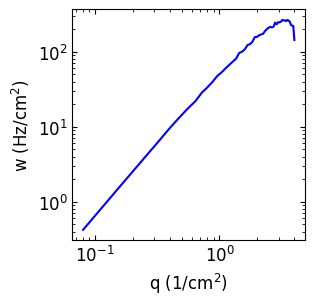

In [217]:
fig,ax=plt.subplots(figsize=(3,3))
fontsize=12
# plt.plot(q_lst,w_lst,color='k')
plt.plot(dout['q'].values,dout['w'].values,color='b')
plt.xscale('log')
plt.yscale('log')
# plt.axis([5e-2,5e0,0.1,100])
plt.tick_params(top=True, right=True,direction='in',which='both')
format_plot(xlabel=r'q (1/cm$^2$)',ylabel=r'w (Hz/cm$^2$)',fontsize=fontsize)
plt.show()

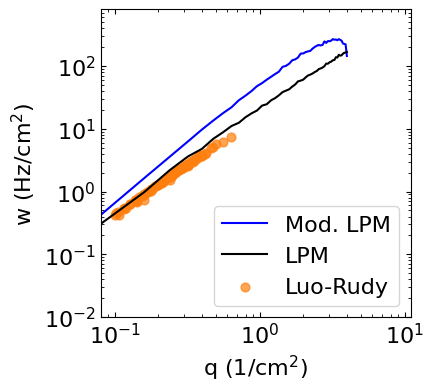

In [218]:
use_filterby_minN=True
minN=10
# minN=8
# figsize = (6, 4)  #(5,4)
figsize = (4, 4)  #(5,4)
fontsize=16

# x1lim=[0.008, 11]
x1lim=[0.08, 11]
# x2lim=[0.01, 250]
# x2lim=[0.01, 500]
x2lim=[0.01, 800]


fig, ax = plt.subplots(figsize=figsize)
ax = plot_death_rates_loglog_full(fk,lr,ax=ax,fontsize=fontsize,x1lim=x1lim, x2lim=x2lim,
                                  show_fk=False,alpha=0.7)
ax.get_legend().remove()
ax.plot(dout['q'].values,dout['w'].values,color='b',label='Mod. LPM')
ax.plot(q_lst,w_lst,color='k',label='LPM')
ax.legend(loc='lower right',fontsize=16)
ax.set_xscale('log')
ax.set_yscale('log')
# AddLegend(ax=ax)
# ax.axis([5e-2,5e0,0.1,100])
ax.tick_params(top=True, right=True,direction='in',which='both')
format_plot(ax=ax,xlabel=r'q (1/cm$^2$)',ylabel=r'w (Hz/cm$^2$)',fontsize=fontsize)
plt.show()

In [188]:
# 100	0.000239968	4	166.6888919
# (166.6888919-160.642570)/160
# niter

In [189]:
save_dir = f"{nb_dir}/data/control_data/modified_lpm_table1_lr_L_5_niter_{niter}.csv"
os.path.exists(save_dir)

True

In [190]:
save_dir

'/Users/timothytyree/Documents/GitHub/bgmc/python/data/control_data/modified_lpm_table1_lr_L_5_niter_10000.csv'

In [191]:
dout.rename({'CollTime':'Tavg','N':'N0'}).to_csv(save_dir,index=False)

In [92]:
# Q: what should I set Nmax to?
# A: Nmax=150 is a good balance between runtime and trace quality
#TODO: dev run #39

In [93]:
# Q: why don't they perfectly touch?
# A: because the first datum is removed.

# comparing my vs. WJ's random number generators
first, assume all uniform distribution generators work fine.  Then, our normal r.v. appear to match.

In [120]:
# @njit
def normalRandom(): 
    """normalRandom returns a normally distributed random value"""
    v1=np.random.uniform()
    v2=np.random.uniform()
    return np.cos(2.*3.141592653589793*v2)*np.sqrt(-2.*np.log(v1));


In [121]:
# @njit
def gasdev():
    R=1.2
    while R>=1:
        V1=2*np.random.uniform()-1
        V2=2*np.random.uniform()-1
        R=V1**2+V2**2  
    FAC=np.sqrt(-2.*np.log(R)/R)
    GSET=V1*FAC
    GASDEV=V2*FAC
    return GASDEV,GSET,FAC

In [152]:
# GASDEV,GSET,FAC = gasdev()
# ran=normalRandom()


In [163]:
np.random.seed(42)
niter=1000000
X = np.array([[normalRandom(),*gasdev()] for i in range(niter)]).T
X.shape

(4, 1000000)

True

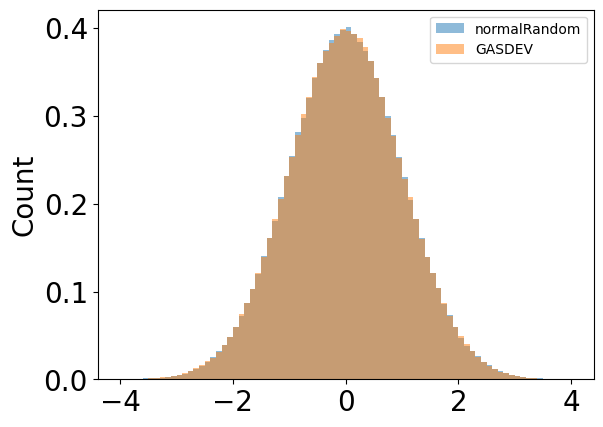

In [164]:
alpha=0.5
density=True
# bins=np.arange(-1,1.05,0.05)
bins=np.arange(-4,4.05,0.1)
plt.hist(X[0],bins=bins,label='normalRandom',alpha=alpha,density=density)
plt.hist(X[1],bins=bins,label='GASDEV',alpha=alpha,density=density)
# plt.hist(X[2],bins=bins,label='GSET',alpha=alpha,density=density)
# plt.hist(X[3],bins=bins,label='FAC',alpha=alpha,density=density)
plt.legend()
format_plot(xlabel='',ylabel='Count',)

In [143]:
# np.concatenate([np.array([tuple(normalRandom(),*gasdev()) for i in range(niter)]),
#      np.array([normalRandom() for i in range(niter)])])

ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 2 dimension(s) and the array at index 1 has 1 dimension(s)

In [140]:
# np.random.seed(42)
# niter=1000
# X = np.stack(
#     [np.array([gasdev() for i in range(niter)]).T,
#      np.array([normalRandom() for i in range(niter)])])
# X.shape

ValueError: all input arrays must have the same shape

In [ ]:
# Q: how does my normalRandom() compare to WJ's gasdev function?
# Q: does WJ's gasdev function give the classical normal distribution?